In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import mysql.connector

In [3]:
import mysql.connector
mydb=mysql.connector.connect(host='localhost',user='root',passwd='Deepak@2003',database='classicmodels')


In [4]:
hcursor=mydb.cursor()

In [5]:
hcursor.execute('show tables;')
hcursor.fetchall()

[('business_kpis',),
 ('customers',),
 ('employees',),
 ('offices',),
 ('orderdetails',),
 ('orders',),
 ('payments',),
 ('productlines',),
 ('products',)]

In [6]:
hcursor.execute('select * from products;')
col=hcursor.column_names
offices=hcursor.fetchall()
pro=pd.DataFrame(offices,columns=col)

In [7]:
pro.head()

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00


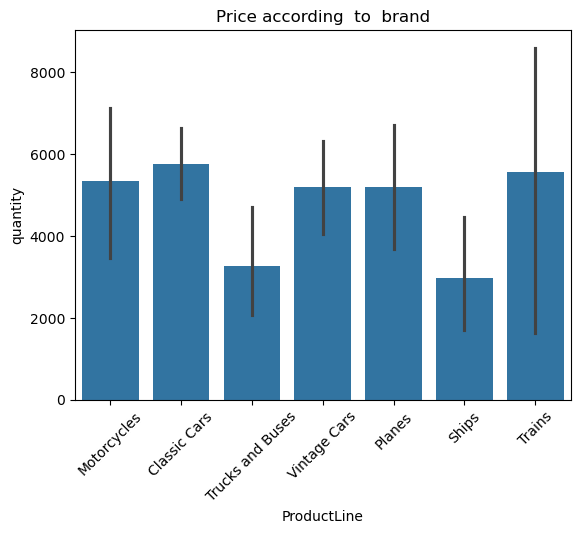

In [8]:
sns.barplot(x='productLine',y='quantityInStock',data=pro)
plt.xlabel('ProductLine')
plt.ylabel('quantity')
plt.title('Price according  to  brand')
plt.xticks(rotation=45)
plt.show()

In [9]:
hcursor.execute('select p.productname,sum(od.quantityordered)\
                 from classicmodels.orderdetails\
                 od inner join classicmodels.products p\
                 on p.productcode=od.productcode group by 1 order by 2 desc limit 10;')
col=hcursor.column_names
fetch=hcursor.fetchall()
product_quantity=pd.DataFrame(fetch,columns=col)

In [17]:
product_quantity.head()

,productname,sum(od.quantityordered)
0,1992 Ferrari 360 Spider red,1808
1,1937 Lincoln Berline,1111
2,American Airlines: MD-11S,1085
3,1941 Chevrolet Special Deluxe Cabriolet,1076
4,1930 Buick Marquette Phaeton,1074


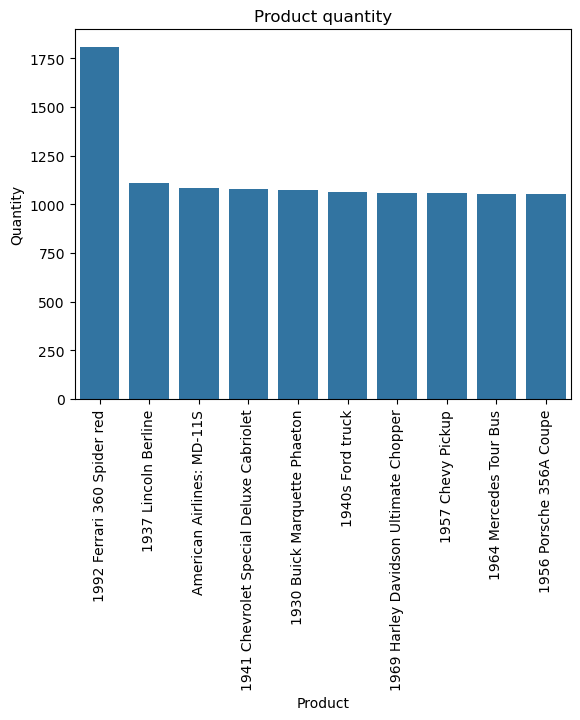

In [21]:
sns.barplot(x='productname',y='sum(od.quantityordered)',data=product_quantity)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Product quantity')
plt.xticks(rotation=90)
plt.show()

In [22]:
hcursor.execute('select status, count(distinct orderNumber)as count_orders \
                from orders \
                group by status')
col=hcursor.column_names
offices=hcursor.fetchall()
pro=pd.DataFrame(offices,columns=col)

In [25]:
pro.tail()

,status,count_orders
1,Disputed,3
2,In Process,6
3,On Hold,4
4,Resolved,4
5,Shipped,303


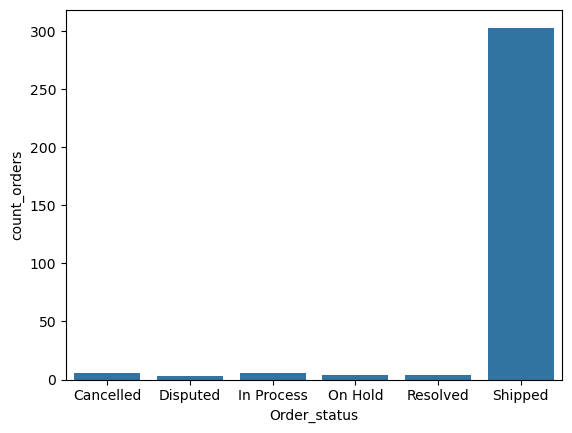

In [27]:
sns.barplot(y = 'count_orders',x= 'status', data=pro)
plt.xlabel('Order_status')
plt.ylabel('count_orders')
plt.show()

In [29]:
hcursor.execute('select * from customers;')
col=hcursor.column_names
customers=hcursor.fetchall()
customers=pd.DataFrame(customers,columns=col)

In [31]:
customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.00
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.00
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.00
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.00
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700.00


In [33]:
hcursor.execute('select * from business_kpis;')
col=hcursor.column_names
business_kpis=hcursor.fetchall()
business_kpis=pd.DataFrame(business_kpis,columns=col)

In [35]:
business_kpis.head()

,country,total_customers,total_orders,total_amount
0,Australia,5,19,2118017.43
1,Austria,2,7,493419.97
2,Belgium,2,7,303630.27
3,Canada,3,7,480801.39
4,Denmark,2,7,717052.10


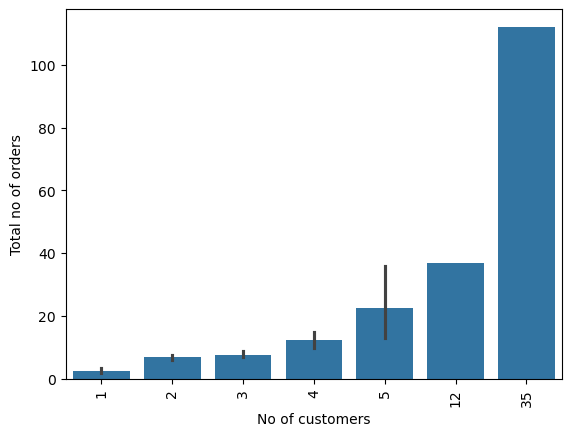

In [37]:
sns.barplot(y = 'total_orders',x= 'total_customers', data=business_kpis)
plt.xlabel('No of customers')
plt.ylabel('Total no of orders')
plt.xticks(rotation=90)
plt.show()

In [39]:
hcursor.execute( "select country,count( distinct customerNumber) as  CustomerNO \
                  from customers\
                  group by 1 order by 2 desc limit 5")
deta=hcursor.fetchall()
country_wise_customers= pd.DataFrame(deta)

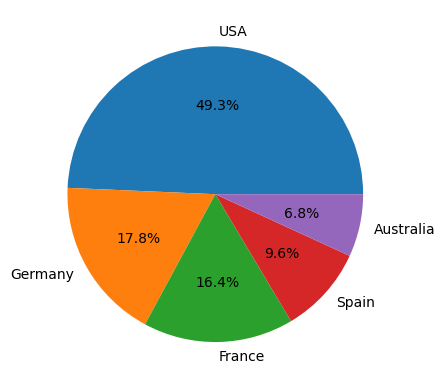

In [43]:
plt.pie(country_wise_customers[1],labels=country_wise_customers[0],autopct='%.1f%%')
plt.show()